In [3]:
from scipy import misc
from PIL import Image
from skimage import exposure
from sklearn import svm

import scipy
from math import sqrt,pi
from numpy import exp
from matplotlib import pyplot as plt
import numpy as np
import glob
import matplotlib.pyplot as pltss
import cv2 as cv
from matplotlib import cm
import pandas as pd
from math import pi, sqrt
import pywt

(494, 512, 3)
[[[1 1 1]
  [1 1 1]
  [1 1 1]
  ...
  [1 1 1]
  [1 1 1]
  [1 1 1]]

 [[1 1 1]
  [1 1 1]
  [1 1 1]
  ...
  [1 1 1]
  [1 1 1]
  [1 1 1]]

 [[1 1 1]
  [1 1 1]
  [1 1 1]
  ...
  [1 1 1]
  [1 1 1]
  [1 1 1]]

 ...

 [[1 1 1]
  [1 1 1]
  [1 1 1]
  ...
  [1 1 1]
  [1 1 1]
  [1 1 1]]

 [[1 1 1]
  [1 1 1]
  [1 1 1]
  ...
  [1 1 1]
  [1 1 1]
  [1 1 1]]

 [[1 1 1]
  [1 1 1]
  [1 1 1]
  ...
  [1 1 1]
  [1 1 1]
  [1 1 1]]]
image source


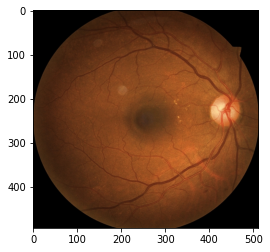

image référence


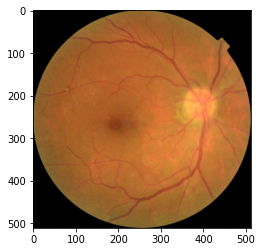

résultat prétraitement


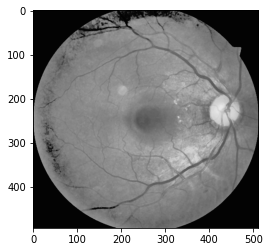

In [22]:
from __future__ import print_function
 
import cv2 # Import the OpenCV library
import numpy as np # Import Numpy library
import matplotlib.pyplot as plt # Import matplotlib functionality
import sys # Enables the passing of arguments

 
#Define the file name of the images

SOURCE_IMAGE = "/home/chakour/Bureau/Codes stagaires/data/test/2/22154_right.jpeg"
REFERENCE_IMAGE = "/home/chakour/Bureau/Codes stagaires/data/test/2/2249_right.jpeg"
image_src_name = SOURCE_IMAGE
image_ref_name = REFERENCE_IMAGE
 
image_src = cv2.imread(image_src_name)
image_ref = cv2.imread(image_ref_name)
print(image_src.shape)
MASK_IMAGE = np.ones(image_src.shape,np.uint8)
OUTPUT_IMAGE = "output"
OUTPUT_MASKED_IMAGE = "output_masked.jpg"
image1 = cv2.imread(SOURCE_IMAGE)
image1_RGB =  cv.cvtColor(image1, cv.COLOR_BGR2RGB)
print("image source") 
plt.imshow(image1_RGB)
plt.show()
image2 = cv2.imread(REFERENCE_IMAGE)
image2_RGB =  cv.cvtColor(image2, cv.COLOR_BGR2RGB)
print("image référence") 
plt.imshow(image2_RGB)
plt.show()


# calculates the cumulative distribution function
def calculate_cdf(histogram):
    cdf = histogram.cumsum()                    # Get the cumulative sum of the elements
    normalized_cdf = cdf / float(cdf.max())     # Normalize the cdf
    return normalized_cdf

# creates the lookup table
def calculate_lookup(src_cdf, ref_cdf):
    lookup_table = np.zeros(256)
    lookup_val = 0
    for src_pixel_val in range(len(src_cdf)):
        lookup_val
        for ref_pixel_val in range(len(ref_cdf)):
            if ref_cdf[ref_pixel_val] >= src_cdf[src_pixel_val]:
                lookup_val = ref_pixel_val
                break
        lookup_table[src_pixel_val] = lookup_val
    return lookup_table

# matches the source image histogram to the reference signal
def match_histograms(src_image, ref_image):
    src_b, src_g, src_r = cv2.split(src_image) # Split the image source into the different color channels
    ref_b, ref_g, ref_r = cv2.split(ref_image) # Split the image reference into the different color channels
    
    # Compute the b, g, and r histograms separately
    src_hist_blue, bin_0 = np.histogram(src_b.flatten(), 256, [0,256])
    src_hist_green, bin_1 = np.histogram(src_g.flatten(), 256, [0,256])
    src_hist_red, bin_2 = np.histogram(src_r.flatten(), 256, [0,256])    
    ref_hist_blue, bin_3 = np.histogram(ref_b.flatten(), 256, [0,256])    
    ref_hist_green, bin_4 = np.histogram(ref_g.flatten(), 256, [0,256])
    ref_hist_red, bin_5 = np.histogram(ref_r.flatten(), 256, [0,256])
 
    # appel of function calculate_cdf for Compute the normalized cdf for the source image
    src_cdf_blue = calculate_cdf(src_hist_blue)
    src_cdf_green = calculate_cdf(src_hist_green)
    src_cdf_red = calculate_cdf(src_hist_red)
    # appel of function calculate_cdf for Compute the normalized cdf for the source image
    ref_cdf_blue = calculate_cdf(ref_hist_blue)
    ref_cdf_green = calculate_cdf(ref_hist_green)
    ref_cdf_red = calculate_cdf(ref_hist_red)
 
    # Make a separate lookup table for each color
    blue_lookup_table = calculate_lookup(src_cdf_blue, ref_cdf_blue)
    green_lookup_table = calculate_lookup(src_cdf_green, ref_cdf_green)
    red_lookup_table = calculate_lookup(src_cdf_red, ref_cdf_red)
 
    # Use the lookup function to transform the colors of the original
    # source image
    blue_after_transform = cv2.LUT(src_b, blue_lookup_table)
    green_after_transform = cv2.LUT(src_g, green_lookup_table)
    red_after_transform = cv2.LUT(src_r, red_lookup_table)
 
    # Put the image back together
    image_after_matching = cv2.merge([
        blue_after_transform, green_after_transform, red_after_transform])
    image_after_matching = cv2.convertScaleAbs(image_after_matching)
 
    return image_after_matching
 
    #"""
    #Main method of the program.
    #"""

 
    # Check if the images loaded properly
if image_src is None:
    print('Failed to load source image file:', image_src_name)
    sys.exit(1)
elif image_ref is None:
    print('Failed to load reference image file:', image_ref_name)
    sys.exit(1)
else:
        # Do nothing
    pass
         
    # Calculate the matched image
output_image = match_histograms(image_src, image_ref)
 
 ### eXtraction du canal de luminance LAB    
lab = cv2.cvtColor(output_image, cv2.COLOR_BGR2LAB)
l, a, b = cv2.split(lab)

#egalisation adaptative d'histogramme
#equalized=cv.equalizeHist(val)
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
cl = clahe.apply(l)

#filtre mediane
median = cv2.medianBlur(cl, 3)   
median1 =  cv.cvtColor(median, cv.COLOR_BGR2RGB)
print("résultat prétraitement") 
plt.imshow(median1)
plt.show()  

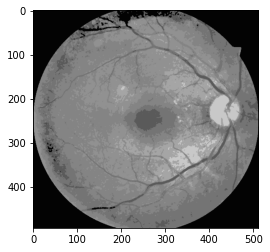

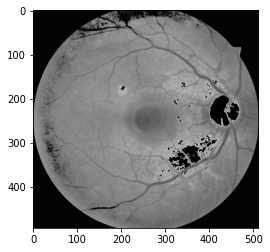

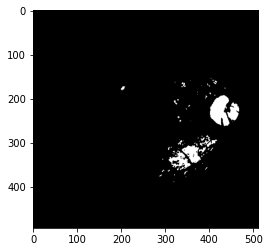

In [28]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import sys

# read the image
image = median

# convert to RGB
image=  cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# reshape the image to a 2D array of pixels and 3 color values (RGB)
pixel_values = image.reshape((-1, 3))
# convert to float
pixel_values = np.float32(pixel_values)

# define stopping criteria
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)

# number of clusters (K)
k = 7
compactness, labels, (centers) = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

# convert back to 8 bit values
centers = np.uint8(centers)

# flatten the labels array
labels = labels.flatten()

# convert all pixels to the color of the centroids
segmented_image = centers[labels]

# reshape back to the original image dimension
segmented_image = segmented_image.reshape(image.shape)

# show the image
plt.imshow(segmented_image)
plt.show()

# disable only the cluster number 2 (turn the pixel into black)
masked_image = np.copy(image)
# convert to the shape of a vector of pixel values
masked_image = masked_image.reshape((-1, 3))
# color (i.e cluster) to disable
cluster = 4
masked_image[labels == cluster] = [0, 0, 0]
#classe = masked_image[labels == cluster]
# convert back to original shape
masked_image = masked_image.reshape(image.shape)
# show the image
#classe = classe.reshape(image.shape)
_, thresh = cv2.threshold(masked_image, 0, 255, cv2.THRESH_BINARY_INV)

mask= np.zeros((3,3),np.uint8)
mask = cv2.resize(mask, (image.shape[1], image.shape[0]), cv2.INTER_NEAREST)
plt.imshow(masked_image)
plt.show()

plt.imshow(thresh)
plt.show()


aprés élimination du disque optique


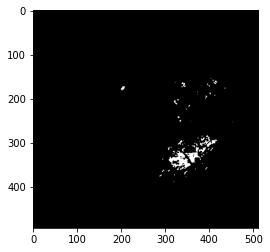

In [29]:
disque = cv2.imread('/home/chakour/Bureau/Codes stagaires/disque_optique.jpeg')
kernel = np.ones((5,5),np.uint8)
disque1= cv2.dilate(disque,kernel) # j'ai appliquer une dilatation sur l'image segmenté de disque optique
result =cv2.subtract(thresh,disque1)
print("aprés élimination du disque optique")
plt.imshow(result)
plt.show()

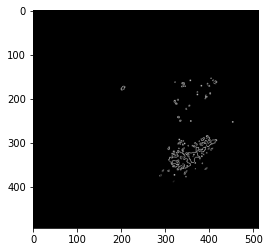

In [30]:
canny = cv2.Canny(result, 100, 200) # détection de bord par algorithme canny
#Combined = cv2.bitwise_and(lap, result)
canny=  cv2.cvtColor(canny, cv2.COLOR_BGR2RGB)

plt.imshow(canny)
plt.show()


In [21]:
cv.imwrite('/home/chakour/Bureau/Codes stagaires/exsudats/exsudats1.jpeg',result)
cv.imwrite('/home/chakour/Bureau/Codes stagaires/exsudats/exsudats1canny.jpeg',canny)

True